In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import

In [3]:
data=pd.read_csv('Data_Preparation/Final_data/FullRandomData.csv')

#### Preprocessing

In [22]:
#aggregating 
data['Pop_abv_18']=data.iloc[:,4:12].sum(axis=1)
data['Pop_btw_18_44']=data.iloc[:,4:7].sum(axis=1)
data['Pop_abv_65']=data.iloc[:,9:12].sum(axis=1)
data['Pop_bclr_dgre_more']=data.iloc[:,21:25].sum(axis=1)
#Renaming
data=data.rename(columns={  'Total Population: Male':'Total_male',
                            'Total Population: Female':'Total_female',
                            'Households: Family Households':'Household_family',
                            'Households: Nonfamily Households':'Household_nonfamily',
                            'Total Population:':'Total_popu',
                            'Per Capita Income (In 2020 Inflation Adjusted Dollars)':'Per_capita',
                            'Households:':'Households',
                            'Owner Occupied Housing Units':'Owner_Occupied_Housing_Units',
                            'In Labor Force 16 Years and Over:':'In_Labor_Force_16_Years_and_Over'
                            })
#Selecting only relevant variables
bike=data.loc[:,['Total_popu','Total_male','Total_female', 'Households','Household_family','Household_nonfamily', 
        'In_Labor_Force_16_Years_and_Over','Per_capita','Owner_Occupied_Housing_Units','land_use','bike_fac12', 
        'trail','lu_entropy', 'Ac_Unpr', 'D3A', 'D3AMM', 'D3APO', 'D3B', 'NatWalkInd', 'D4A', 'D4C',
       'D4D','Pop_abv_18','Pop_btw_18_44', 'Pop_abv_65', 'Pop_bclr_dgre_more',
         'str_bik_21', 'str_bik_22']]
ped=data.loc[:,['Total_popu','Total_male','Total_female', 'Households','Household_family','Household_nonfamily', 
        'In_Labor_Force_16_Years_and_Over','Per_capita','Owner_Occupied_Housing_Units','land_use','bike_fac12', 
        'trail','lu_entropy', 'Ac_Unpr', 'D3A', 'D3AMM', 'D3APO', 'D3B', 'NatWalkInd', 'D4A', 'D4C',
       'D4D', 'Pop_abv_18','Pop_btw_18_44', 'Pop_abv_65', 'Pop_bclr_dgre_more',
        'str_ped_21', 'str_ped_22']]
#Excluding NaN
bike=bike[(bike.str_bik_21.notna())&(bike.str_bik_22.notna())]
ped=ped[(ped.str_ped_21.notna())&(ped.str_ped_22.notna())]
bike.reset_index(drop=True, inplace=True)
ped.reset_index(drop=True, inplace=True)

In [23]:
#Doubling dataset by changing the output y for the same data to 2021 and 2022
bike21=bike.drop(['str_bik_22'], axis=1).rename(columns={'str_bik_21':'strava'})
bike22=bike.drop(['str_bik_21'], axis=1).rename(columns={'str_bik_22':'strava'})
ped21=ped.drop(['str_ped_22'], axis=1).rename(columns={'str_ped_21':'strava'})
ped22=ped.drop(['str_ped_21'], axis=1).rename(columns={'str_ped_22':'strava'})
#Coding year
bike21['year']=1
bike22['year']=2
ped21['year']=1
ped22['year']=2

#CONCAT
bike2=pd.concat([bike21,bike22])
ped2=pd.concat([ped21,ped22])
#There are 6034 Nan in smart location data
bike2=bike2[bike2.D4A.notna()]
ped2=ped2[ped2.D4A.notna()]

In [24]:
print(len(bike2))
print(len(ped2))

37162
33666


#### Converting into category

In [25]:
bike2.strava.describe()

count    37162.000000
mean        11.758058
std         17.442103
min          5.000000
25%          5.422663
50%          6.593750
75%         10.707070
max        785.562500
Name: strava, dtype: float64

In [26]:
new_st=[]
for x in bike2.strava:
    if (x<=10):
        new_st.append("A")
    if (x<=100) & (x>10):
        new_st.append("B")
    if (x>100):
        new_st.append('C')

[[x,new_st.count(x)] for x in set(new_st)]


[['A', 27079], ['B', 9893], ['C', 190]]

In [27]:
ped2.strava.describe()

count    33666.000000
mean        10.950032
std         27.303452
min          5.000000
25%          5.287829
50%          6.072530
75%          8.416667
max        841.666667
Name: strava, dtype: float64

In [28]:
new_st_p=[]
for x in ped2.strava:
    if (x<=10):
        new_st_p.append("A")
    if (x<=100) & (x>10):
        new_st_p.append("B")
    if (x>100):
        new_st_p.append('C')
[[x,new_st_p.count(x)] for x in set(new_st_p)]

[['A', 27377], ['B', 5964], ['C', 325]]

#### Sampling

In [29]:
import phik

In [30]:
bike2.strava=new_st
ped2.strava=new_st_p

In [31]:
bike_sample=bike2.sample(random_state=99, replace=False, n=20000)
ped_sample=ped2.sample(random_state=99, replace=False, n=20000)

In [32]:
#Making X and y 
bike_X=bike_sample.drop(['strava'], axis=1)
bike_y=bike_sample['strava']

#Making X and y and Getting dummies
ped_X=ped_sample.drop(['strava'], axis=1)
ped_y=ped_sample['strava']



interval columns not set, guessing: ['Total_popu', 'Total_male', 'Total_female', 'Households', 'Household_family', 'Household_nonfamily', 'In_Labor_Force_16_Years_and_Over', 'Per_capita', 'Owner_Occupied_Housing_Units', 'lu_entropy', 'Ac_Unpr', 'D3A', 'D3AMM', 'D3APO', 'D3B', 'NatWalkInd', 'D4A', 'D4C', 'D4D', 'Pop_abv_18', 'Pop_btw_18_44', 'Pop_abv_65', 'Pop_bclr_dgre_more', 'year']


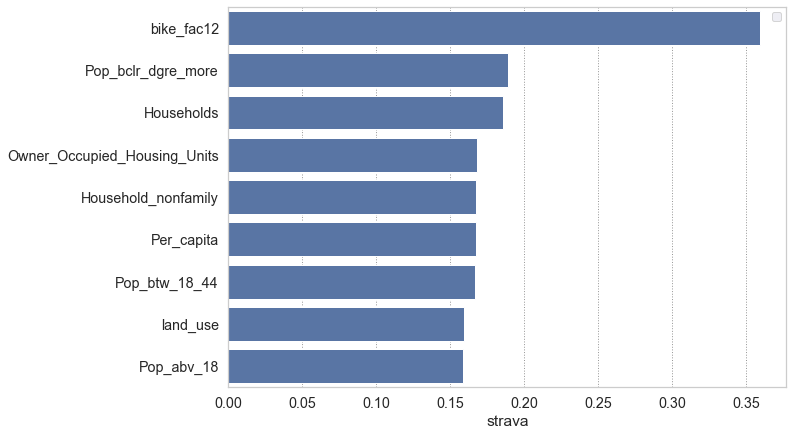

In [33]:
bike_data=pd.concat([bike_X,bike_y], axis=1)
imp_var=bike_data.phik_matrix()['strava'].sort_values(ascending=False)
sns.set(font_scale=1.3)
sns.set_style("whitegrid",{"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(y=imp_var.index[1:10], x=imp_var[1:10], orient = 'h', color='b')
#.set_yticklabels(['Bike Fac', 'Trail', "Bachelors Dgre", 'Household', 'Per Capita', "Owner's House", 'Popu abv 18'])
sns.set(rc= {'figure.figsize': (10,7)})
plt.legend([],[])

In [34]:
X=bike_X.loc[:,('bike_fac12','Per_capita','Pop_bclr_dgre_more','Household_nonfamily','Households','Pop_abv_18','Pop_abv_65','In_Labor_Force_16_Years_and_Over')]
X.bike_fac12=bike_X.bike_fac12.astype('category').cat.codes

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler     
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, bike_y, test_size=0.3, stratify=bike_y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4374    0    0]
 [1593    0    0]
 [  33    0    0]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.73      1.00      0.84      4374
           B       0.00      0.00      0.00      1593
           C       0.00      0.00      0.00        33

    accuracy                           0.73      6000
   macro avg       0.24      0.33      0.28      6000
weighted avg       0.53      0.73      0.61      6000



#### Ped

interval columns not set, guessing: ['Total_popu', 'Total_male', 'Total_female', 'Households', 'Household_family', 'Household_nonfamily', 'In_Labor_Force_16_Years_and_Over', 'Per_capita', 'Owner_Occupied_Housing_Units', 'lu_entropy', 'Ac_Unpr', 'D3A', 'D3AMM', 'D3APO', 'D3B', 'NatWalkInd', 'D4A', 'D4C', 'D4D', 'Pop_abv_18', 'Pop_btw_18_44', 'Pop_abv_65', 'Pop_bclr_dgre_more', 'year']


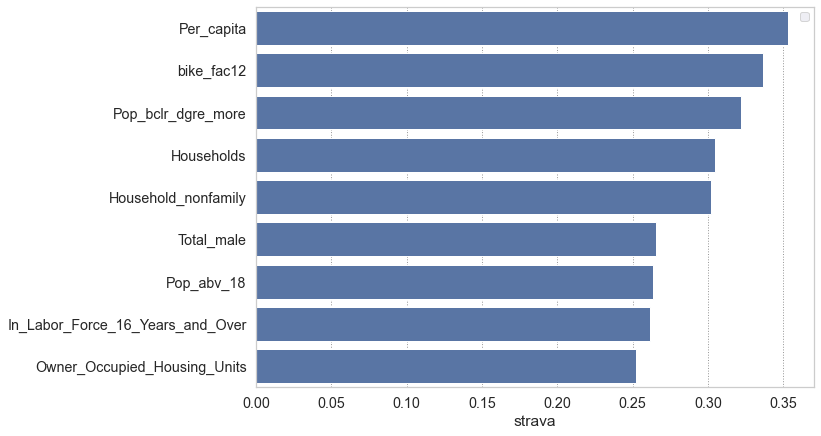

In [39]:
ped_data=pd.concat([ped_X,ped_y], axis=1)
imp_var=ped_data.phik_matrix()['strava'].sort_values(ascending=False)
sns.set(font_scale=1.3)
sns.set_style("whitegrid",{"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(y=imp_var.index[1:10], x=imp_var[1:10], orient = 'h', color='b')
#.set_yticklabels(['Bike Fac', 'Trail', "Bachelors Dgre", 'Household', 'Per Capita', "Owner's House", 'Popu abv 18'])
sns.set(rc= {'figure.figsize': (10,7)})
plt.legend([],[])

In [40]:
X=ped_X.loc[:,('bike_fac12','Per_capita','Pop_bclr_dgre_more','Household_nonfamily','Households','Pop_abv_18','Pop_btw_18_44','In_Labor_Force_16_Years_and_Over')]
X.bike_fac12=ped_X.bike_fac12.astype('category').cat.codes

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, ped_y, test_size=0.3,stratify=ped_y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [43]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.82      0.99      0.90      4882
           B       0.48      0.06      0.11      1063
           C       0.00      0.00      0.00        55

    accuracy                           0.81      6000
   macro avg       0.43      0.35      0.34      6000
weighted avg       0.75      0.81      0.75      6000



### MODEL 1: BIKE Neural Network Regression 

Neural Network Regression model strava data from 2021 only


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import  models
from tensorflow.keras.layers import Dense
import os

import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [112]:
#Functions for plotting results
#ECDF density plot
def abs_err_nn(predicted, y, dataset_type):
    predicted=predicted.reshape(1,-1)[0]
    abs_err=abs(y-predicted)
    print("MAE: ",abs_err.mean())
    #Plot
    Title='Density Curve of Absolute Error '+ dataset_type
    sns.displot(data=abs_err, kind="ecdf").set(title=Title)
def abs_err_nn_xlimit(predicted, y, dataset_type, x_limit=100):
    predicted=predicted.reshape(1,-1)[0]
    abs_err=abs(y-predicted)
    print("MAE: ",abs_err.mean())
    #Plot
    Title='Density curve of Absolute Error '+ dataset_type
    g=sns.displot(data=abs_err, kind="ecdf").set(title=Title)
    g.set(xlim=(0,x_limit))
    g.set(xlabel='Abs Error')

#### Bike NN

In [48]:
#Making X and y and Getting dummies

bike_X_D=np.asarray(pd.get_dummies(bike_X)).astype(np.float32)

#Normalize
mean=bike_X_D.mean(axis=0)
bike_X_D-=mean
std=bike_X_D.std(axis=0)
bike_X_D/=std

X_train, X_test, y_train, y_test = train_test_split(bike_X_D, bike_y, test_size=0.3, random_state=98)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [104]:


n_rows, n_features = X_train.shape
number_of_classes = 5

model = models.Sequential()
model.add(Dense(16, input_shape=(n_features,), activation=tf.nn.sigmoid))
model.add(Dense(number_of_classes, activation=tf.nn.softmax))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Use 'sparse_categorical_crossentropy' if your target labels are integers
# Use 'categorical_crossentropy' if your target labels are one-hot encoded
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['mae','mse', 'mape'])

history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=32,
                    verbose=0,
                    validation_split=0.4)

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                640       
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 85        
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

n_rows,n_features=X_train.shape
model = models.Sequential()
model.add(Dense(16,input_shape=(n_features,), activation=tf.nn.sigmoid))
model.add(Dense(5, activation=tf.nn.relu))


optimizer = tf.keras.optimizers.RMSprop(
                learning_rate=0.001
                )
model.compile(optimizer = optimizer, 
            loss = 'mape', 
            metrics = ['mae','mse', 'mape'])
history=model.fit(X_train, 
        y_train, 
        epochs =40,
        batch_size=32, verbose=0, validation_split=0.4) 
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                640       
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 85        
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [97]:
y_test_hat

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [108]:
y_test = label_encoder.transform(y_test)
y_p = model.predict(X_test)
y_test_hat = np.argmax(y_p, axis=1)

print(f'mean abs error = {mean_absolute_error(np.exp(y_test),np.exp(y_test_hat))}')
print(f'mean abs % error = {mean_absolute_percentage_error(np.exp(y_test),np.exp(y_test_hat))}')
print(f'mean sqred error = {mean_squared_error(np.exp(y_test),np.exp(y_test_hat))}')

mean abs error = 0.5396111814639669
mean abs % error = 0.20154978613475388
mean sqred error = 1.7037229748228984


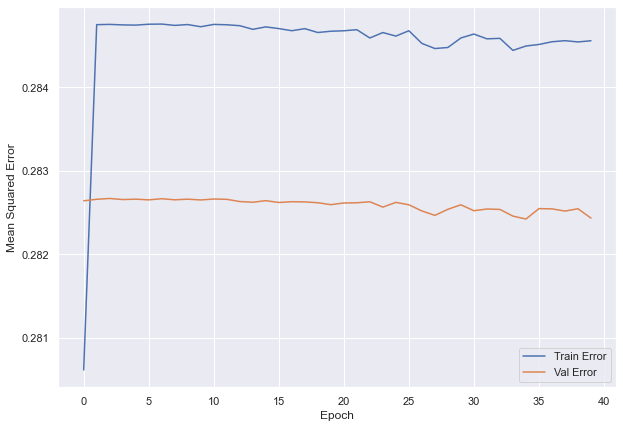

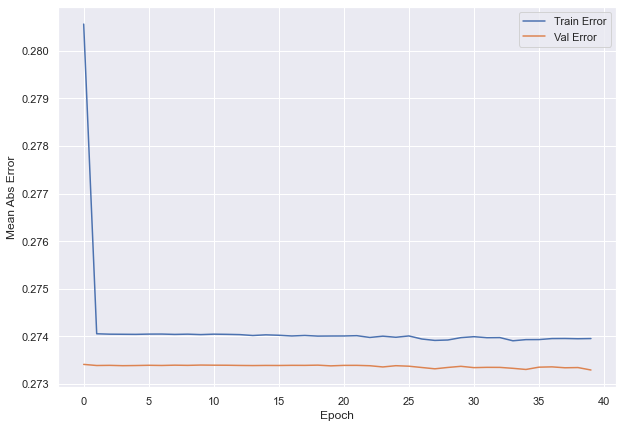

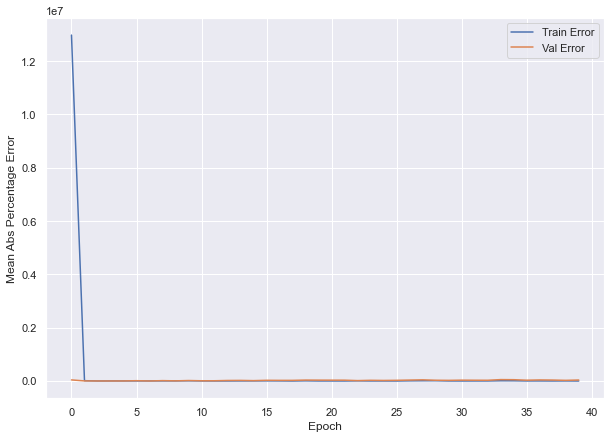

In [109]:
def plot_history(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel("Mean Squared Error")
    plt.plot(hist['epoch'],hist['mse'], label="Train Error")
    plt.plot(hist['epoch'],hist['val_mse'], label="Val Error")
    plt.legend()
    #plt.ylim([0.2,0.6])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel("Mean Abs Error")
    plt.plot(hist['epoch'],hist['mae'], label="Train Error")
    plt.plot(hist['epoch'],hist['val_mae'], label="Val Error")
    plt.legend()
    #plt.ylim([0.3,0.6])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel("Mean Abs Percentage Error")
    plt.plot(hist['epoch'],hist['mape'], label="Train Error")
    plt.plot(hist['epoch'],hist['val_mape'], label="Val Error")
    plt.legend()
    #plt.ylim([10,25])
plot_history(history)

In [44]:
y_test_hat=model.predict(X_test)
print(f'mean abs error = {mean_absolute_error(np.exp(y_test),np.exp(y_test_hat))}')
print(f'mean abs % error = {mean_absolute_percentage_error(np.exp(y_test),np.exp(y_test_hat))}')
print(f'mean sqred error = {mean_squared_error(np.exp(y_test),np.exp(y_test_hat))}')

mean abs error = 5.794438062073937
mean abs % error = 0.286785321986352
mean sqred error = 285.70424263527826


MAE:  0.2851666666666667


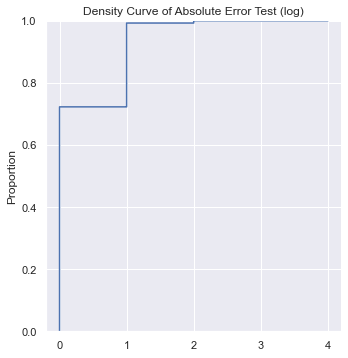

In [113]:
abs_err_nn(y_test_hat,y_test,dataset_type='Test (log)')

MAE:  0.5396111814639669


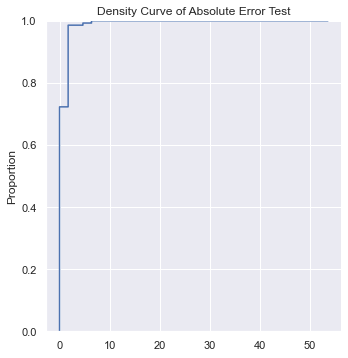

In [114]:
abs_err_nn(np.exp(y_test_hat),np.exp(y_test),dataset_type='Test') #Unlogged

#### Ped NN

In [130]:
#Making X and y and Getting dummies
ped_X_D=np.asarray(pd.get_dummies(ped_X)).astype(np.float32)
#Normalize

X_train, X_test, y_train, y_test = train_test_split(ped_X_D, ped_y, test_size=0.3, random_state=98)

In [131]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

model = models.Sequential()
model.add(Dense(16, activation=tf.nn.sigmoid))
model.add(Dense(1, activation=tf.nn.relu))


optimizer = tf.keras.optimizers.RMSprop(
                learning_rate=0.001
                )
model.compile(optimizer = optimizer, 
            loss = 'mse', 
            metrics = ['mae','mse', 'mape'])
history=model.fit(X_train, 
        y_train, 
        epochs = 40,
        batch_size=32, verbose=0, validation_split=0.4) 
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 16)                640       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________
None


In [132]:
y_test = label_encoder.transform(y_test)
y_p = model.predict(X_test)
y_test_hat = np.argmax(y_p, axis=1)
print(f'mean abs error = {mean_absolute_error(np.exp(y_test),np.exp(y_test_hat))}')
print(f'mean abs % error = {mean_absolute_percentage_error(np.exp(y_test),np.exp(y_test_hat))}')
print(f'mean sqred error = {mean_squared_error(np.exp(y_test),np.exp(y_test_hat))}')

mean abs error = 0.3544698700502842
mean abs % error = 0.11876389928710598
mean sqred error = 0.8428402073529414


In [55]:
y_test_hat=model.predict(X_test)
print(f'mean abs error = {mean_absolute_error(y_test,y_test_hat)}')
print(f'mean abs % error = {mean_absolute_percentage_error(y_test,y_test_hat)}')
print(f'mean sqred error = {mean_squared_error(y_test,y_test_hat)}')

mean abs error = 0.3844159112315556
mean abs % error = 0.17627693730244978
mean sqred error = 0.31995120781144787


MAE:  0.19283333333333333


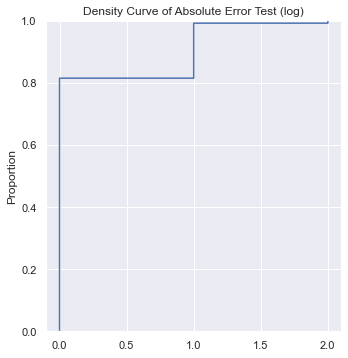

In [133]:
abs_err_nn(y_test_hat,y_test,dataset_type='Test (log)')

MAE:  0.3544698700502842


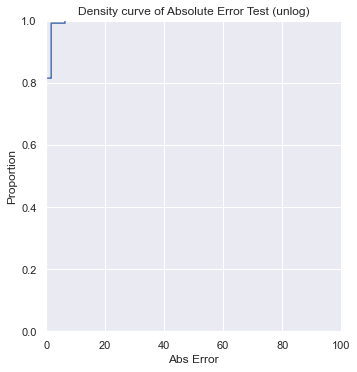

In [134]:
abs_err_nn_xlimit(np.exp(y_test_hat),np.exp(y_test),dataset_type='Test (unlog)')

#### 

### XGBOOST

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#### Bike

In [41]:
import xgboost as xg
#print(xgboost.__version__)

In [42]:

bike_X_D=np.asarray(pd.get_dummies(bike_X)).astype(np.float32)

#Normalize
mean=bike_X_D.mean(axis=0)
bike_X_D-=mean
std=bike_X_D.std(axis=0)
bike_X_D/=std
#Label Encoder for y
le=LabelEncoder()
bike_y_num=le.fit_transform(bike_y)

X_train, X_test_, y_train, y_test_ = train_test_split(bike_X_D, bike_y_num, test_size=0.4, random_state=98)
X_val, X_test, y_val, y_test = train_test_split(X_test_, y_test_, test_size=0.5, random_state=98)

In [124]:
#Parameter tuning:::::::::::::;
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     "max_depth": [3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.05],
#     "gamma": [0, 0.25, 1],
#     "reg_lambda": [0, 1, 10],
#     "scale_pos_weight": [1, 3, 5],
#     "subsample": [0.8],
#     "colsample_bytree": [0.5],
# }
# # Init classifier
# xgb_cl = xg.XGBClassifier()

# # Init Grid Search
# grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# # Fit
# _ = grid_cv.fit(X_val, y_val)
#grid_cv.best_params_
'''
{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}
 '''

In [43]:

model = xg.XGBClassifier(colsample_bytree= 1,gamma= 0,
 learning_rate= 0.5,
 max_depth= 6,
 reg_lambda= 0,
 scale_pos_weight= 1,
 subsample= 0.8)
model.fit(X_train, y_train)
y_test_hat=model.predict(X_test)
accuracy_score(y_test, y_test_hat)

[19:00:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.845

train accuracy 93.32%

In [44]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2910
           1       0.78      0.59      0.67      1067
           2       0.83      0.43      0.57        23

    accuracy                           0.84      4000
   macro avg       0.82      0.66      0.71      4000
weighted avg       0.84      0.84      0.84      4000



#### Ped

In [45]:
#Making X and y and Getting dummies
ped_X_D=np.asarray(pd.get_dummies(ped_X)).astype(np.float32)
#Normalize
#Normalize
mean=ped_X_D.mean(axis=0)
ped_X_D-=mean
std=ped_X_D.std(axis=0)
ped_X_D/=std
#Label Encoder for y
le=LabelEncoder()
ped_y_num=le.fit_transform(ped_y)

X_train, X_test_, y_train, y_test_ = train_test_split(ped_X_D, ped_y_num, test_size=0.4, random_state=98)
X_val, X_test, y_val, y_test = train_test_split(X_test_, y_test_, test_size=0.5, random_state=98)

In [155]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
# Init classifier
xgb_cl = xg.XGBClassifier()

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_val, y_val)

#Parameter tuning results::
#grid_cv.best_params_
"""
{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}


""

[18:39:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [46]:

model = xg.XGBClassifier(colsample_bytree= 1,gamma= 0,
 learning_rate= 0.5,
 max_depth= 6,
 reg_lambda= 0,
 scale_pos_weight= 1,
 subsample= 0.8)
model.fit(X_train, y_train)
y_test_hat=model.predict(X_test)
accuracy_score(y_test, y_test_hat)

[19:01:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.8765

train acc 96.45%

In [47]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3263
           1       0.71      0.51      0.60       701
           2       0.81      0.61      0.70        36

    accuracy                           0.88      4000
   macro avg       0.81      0.69      0.74      4000
weighted avg       0.87      0.88      0.87      4000

